In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# For Basic Operations
import numpy as np
import pandas as pd

# for Datetime Manipulation
import datetime

# For Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for Interactive Analysis
from ipywidgets import interact, interact_manual

In [2]:
# lets import the Dataset
data = pd.read_csv('movies.csv')

# lets check the shape of the dataset
data.shape

(9742, 3)

In [3]:
# lets check the head of the dataset
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# lets also check the ratings dataset
rating = pd.read_csv('ratings.csv')

# lets check the shape also
rating.shape

(100836, 4)

In [5]:
# lets check the head of the rating data
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# As we are going to Perform the Content Based Filtering
# lets merge the rating data with the movie data
data = pd.merge(data, rating, on = 'movieId', how = 'inner')

# lets check the shape of the Merged Dataset
data.shape

(100836, 6)

In [7]:
# Lets check the Head of the Merged Dataset
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [8]:
# As we do not Require the MovieId, UserId and Timestamp lets remove them
data = data.drop(['movieId', 'userId', 'timestamp'], axis = 1)

# lets check the head of the Final Dataset
data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [9]:
# Now, We Have to Groupby the Dataset Based on the Movie Title

data = pd.pivot_table(data, index = ['title','genres'], aggfunc = 'mean')
data.reset_index(level=['title','genres'], inplace = True)
data.head()

,title,genres,rating
0,'71 (2014),Action|Drama|Thriller|War,4.0
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.0
2,'Round Midnight (1986),Drama|Musical,3.5
3,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.0
4,'Til There Was You (1997),Drama|Romance,4.0


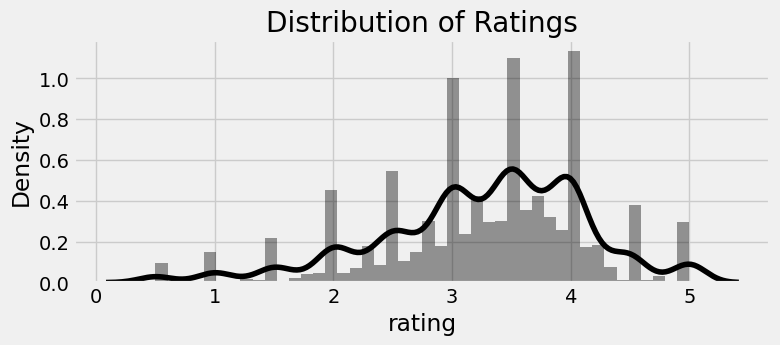

In [10]:
# lets check the Distribution of Ratings across the Movies

plt.rcParams['figure.figsize'] = (8, 3)
plt.style.use('fivethirtyeight')
sns.distplot(data['rating'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()

In [11]:
pd.set_option('display.max_rows', 110)

In [12]:
# Lets Extract Year of Release from the Movie Title
data['y'] = data['title'].str.split(' ')
data['year'] = data['y'].apply(lambda x: x[-1])

# lets drop the unnecessary 'y' column from the dataset
data = data.drop(['y'], axis = 1)

# lets remove the Opening and Closing Brackets from the String
data['year'] = data['year'].str.strip(')')
data['year'] = data['year'].str.strip('(')

# lets check the Values After Extraction

data['year'].value_counts()

2002      311
2006      295
2001      294
2000      283
2009      282
         ... 
1919        1
Mirror      1
1915        1
5           1
1902        1
Name: year, Length: 120, dtype: int64

In [13]:
# There are some Dirty Values, Let's Clean them
data['year'] = data['year'].replace(('Despot','Things', '1975-1979','Road', '','Mirror','5','Cosmos',
                                     '2006–2007', '2', 'Baby', 'Moonlight','Animals', 'Paterson', 'One', 'Watson','OA'),
                                   ('2016','2016','1979','2002','1996','2018','1998','2014','2007','2017','2017','2016',
                                   '2016','2016','2018','1980','2016'))

# lets convert the year column into Integer data type
data['year'] = data['year'].astype(int)

# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,'71 (2014),Action|Drama|Thriller|War,4.0,2014
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.0,2004
2,'Round Midnight (1986),Drama|Musical,3.5,1986
3,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.0,2004
4,'Til There Was You (1997),Drama|Romance,4.0,1997


In [14]:
print('First Realease Year :', data['year'].min())
print('Last Realease Year :',data['year'].max())

First Realease Year : 1902
Last Realease Year : 2018


In [15]:
# lets remove the Year from the Movie Titles
data['title'] = data['title'].str.split(' ')
data['title'] = data['title'].apply(lambda x: ' '.join(x[:-1]))


# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,'71,Action|Drama|Thriller|War,4.0,2014
1,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,4.0,2004
2,'Round Midnight,Drama|Musical,3.5,1986
3,'Salem's Lot,Drama|Horror|Mystery|Thriller,5.0,2004
4,'Til There Was You,Drama|Romance,4.0,1997


In [16]:
# Lets check the Latest Movies - the Last Year mentioned in the Dataset is 2016
data[data['year'] == 2016][['title','rating']].sort_values(by = 'rating',
                ascending = False).head(10).reset_index(drop = True).style.background_gradient(cmap = 'Wistia')

,title,rating
0,Indignation,5.000000
1,SORI: Voice from the Heart,5.000000
2,The Girl with All the Gifts,5.000000
3,Tom Segura: Mostly Stories,5.000000
4,Ice Age: The Great Egg-Scapade,5.000000
5,All Yours,5.000000
6,,5.000000
7,O.J.: Made in America,4.500000
8,Miss Sloane,4.500000
9,Jim Jefferies: Freedumb,4.500000


In [17]:
# lets Check the Number of Movies that got 5 Star Reviews and Less than 1 Star Reviews

print("The Number of Movies that received 5 Star Reviews :", data[data['rating'] == 5]['title'].count())
print("Percentage of Movies Getting 5 Star Reviews : {0:.2f}%".format((data[data['rating'] == 5]['title'].count())/
                                                                      (data.shape[0])*100))
print("\nThe Number of Movies that received less than 1 Star Reviews :", data[data['rating'] <= 1]['title'].count())
print("The Percentage of Movies Getting Less than 1 Star Reviews : {0:.2f}%".format((
    data[data['rating'] <= 1]['title'].count())/(data.shape[0])*100))

The Number of Movies that received 5 Star Reviews : 296
Percentage of Movies Getting 5 Star Reviews : 3.04%

The Number of Movies that received less than 1 Star Reviews : 258
The Percentage of Movies Getting Less than 1 Star Reviews : 2.65%


In [18]:
# lets create an Interactive Function to get the List of Best Movies from Each Genre

@interact
def genre(Genre = ['Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance','Sci-Fi', 'Thriller', 'War', 'Western'], year = 2000):
    x = data['genres'].str.split('|')
    d = data.drop(['genres'], axis = 1)
    x = pd.concat([d, x], axis = 1)
    x = x.explode('genres')
    x= x[(x['genres'] == Genre) & (x['year'] >= year)][['title', 'rating', 'year']].sort_values(by = 'rating',
                            ascending = False).reset_index(drop = True).head(10)
    return x

interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Animation', 'Children', '…

In [19]:
from mlxtend.preprocessing import TransactionEncoder

# lets split all the Genres into Transactions
genres = data['genres'].str.split('|')
te = TransactionEncoder()
genres = te.fit_transform(genres)
genres = pd.DataFrame(genres, columns = te.columns_)

genres.head(2)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False
1,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False


In [20]:
# lets convert this data into boolean so that we can perform calculations
genres = genres.astype('int')
genres.insert(0, 'title', data['title'])
genres.head(2)

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,'71,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,'Hellboy': The Seeds of Creation,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# lets Transpose the Dataset
genres = genres.transpose()
genres = genres.rename(columns = genres.iloc[0])
genres = genres.drop(genres.index[0])
genres = genres.astype(int)

# lets check the head of genres
genres.head(2)

,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0


In [22]:
# making a recommendation engine for getting similar movies

@interact
def recommendation_movie(movie = list(genres.columns)):    
    similar_movies = genres.corrwith(genres[movie])
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

interactive(children=(Dropdown(description='movie', options=("'71", "'Hellboy': The Seeds of Creation", "'Roun…